In [73]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight

# Initializing Dataset

In [8]:
Data=pd.read_csv(r'/kaggle/input/2019-airline-delays-and-cancellations/train.csv')
print('Initial length of data:',len(Data))
Data.head()

Initial length of data: 4542343


,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,Chicago O'Hare International,0.00,0.0,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,El Paso International,0.00,0.0,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,NONE,0.00,0.0,0.0,54.0,0.45,0.117559,0.187867,0.139886,0.060327
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,San Jose International,0.00,0.0,0.0,64.0,8.05,0.204389,0.141446,0.132868,0.202037
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,Cincinnati/Northern Kentucky International,0.01,0.0,0.0,94.0,10.51,0.203263,0.193761,0.203027,0.113050


# Analyzing NA/Null Values in Dataset

In [9]:
Data.isna().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
CARRIER_HISTORICAL               0
DEP_AIRPORT_HIST                 0
DAY_HISTORICAL      

# Checking for Dataset Column Categories

In [10]:
for col in Data.columns:
    uniq=Data[col].unique()
    print(col,'->',uniq,'->',f"{round(len(uniq)/(len(Data)/100),2)}%",'->',len(uniq),end='\n\n---------------------------------------------------------------------------------------\n\n')

MONTH -> [ 7  4 11  3  9  8 10  1  5  6  2 12] -> 0.0% -> 12

---------------------------------------------------------------------------------------

DAY_OF_WEEK -> [7 1 4 2 3 6 5] -> 0.0% -> 7

---------------------------------------------------------------------------------------

DEP_DEL15 -> [0 1] -> 0.0% -> 2

---------------------------------------------------------------------------------------

DEP_TIME_BLK -> ['1500-1559' '1300-1359' '0001-0559' '0800-0859' '0700-0759' '1900-1959'
 '2000-2059' '1200-1259' '1100-1159' '1400-1459' '1000-1059' '1700-1759'
 '1600-1659' '2200-2259' '0900-0959' '0600-0659' '1800-1859' '2100-2159'
 '2300-2359'] -> 0.0% -> 19

---------------------------------------------------------------------------------------

DISTANCE_GROUP -> [ 3  4  2  7  1  8 11  5  6 10  9] -> 0.0% -> 11

---------------------------------------------------------------------------------------

SEGMENT_NUMBER -> [ 3  4  1  5  2  6  7  8 10  9 11 12 14 13 15] -> 0.0% -> 15

---

# **Curated Important features are:**
* MONTH                          
* DAY_OF_WEEK                    
* DEP_DEL15
* DEP_TIME_BLK                     
* DISTANCE_GROUP                   
* SEGMENT_NUMBER                   
* CONCURRENT_FLIGHTS               
* NUMBER_OF_SEATS                  
* CARRIER_NAME                     
* AIRPORT_FLIGHTS_MONTH            
* AIRLINE_FLIGHTS_MONTH            
* AIRLINE_AIRPORT_FLIGHTS_MONTH    
* PLANE_AGE                        
* LATITUDE                         
* LONGITUDE                        
* PRCP                             
* SNOW                             
* SNWD                             
* TMAX                             
* AWND

In [11]:
Data=Data.drop(['AVG_MONTHLY_PASS_AIRPORT','PREVIOUS_AIRPORT','AVG_MONTHLY_PASS_AIRLINE','FLT_ATTENDANTS_PER_PASS','GROUND_SERV_PER_PASS','DEPARTING_AIRPORT','CARRIER_HISTORICAL','DEP_AIRPORT_HIST','DAY_HISTORICAL','DEP_BLOCK_HIST'],axis=1)

In [12]:
Data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,79247,7972,6,35.219,-80.936,0.00,0.0,0.0,95.0,4.25
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,67082,3655,15,39.774,-104.880,0.00,0.0,0.0,71.0,11.41
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,25517,300,3,34.729,-92.234,0.00,0.0,0.0,54.0,0.45
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,114119,3282,19,32.733,-117.187,0.00,0.0,0.0,64.0,8.05
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,28267,6058,15,41.978,-87.906,0.01,0.0,0.0,94.0,10.51


# **Categorize String specific columns to Numerical**

In [13]:
Data['DEP_TIME_BLK']=Data['DEP_TIME_BLK'].replace({'1500-1559':15 ,'1300-1359':13 ,'0001-0559':1 ,'0800-0859':8 ,'0700-0759':7 ,'1900-1959':19 ,'2000-2059':20 ,'1200-1259':12 ,'1100-1159':11 ,'1400-1459':14 ,'1000-1059':10 ,'1700-1759':17 ,'1600-1659':16 ,'2200-2259':22 ,'0900-0959':9 ,'0600-0659':6 ,'1800-1859':18 ,'2100-2159':21 ,'2300-2359':23})
Data['CARRIER_NAME']=Data['CARRIER_NAME'].replace({'American Airlines Inc.':1 ,'SkyWest Airlines Inc.':2 ,'American Eagle Airlines Inc.':3 ,'Southwest Airlines Co.':4 ,'JetBlue Airways':5 ,'United Air Lines Inc.':6 ,'Alaska Airlines Inc.':7 ,'Atlantic Southeast Airlines':8 ,'Delta Air Lines Inc.':9 ,'Midwest Airline, Inc.':10 ,'Comair Inc.':11 ,'Endeavor Air Inc.':12 ,'Frontier Airlines Inc.':13 ,'Spirit Air Lines':14 ,'Mesa Airlines Inc.':15 ,'Allegiant Air':16 ,'Hawaiian Airlines Inc.':17})
Data.head()

/tmp/ipykernel_35/2672203615.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data['DEP_TIME_BLK']=Data['DEP_TIME_BLK'].replace({'1500-1559':15 ,'1300-1359':13 ,'0001-0559':1 ,'0800-0859':8 ,'0700-0759':7 ,'1900-1959':19 ,'2000-2059':20 ,'1200-1259':12 ,'1100-1159':11 ,'1400-1459':14 ,'1000-1059':10 ,'1700-1759':17 ,'1600-1659':16 ,'2200-2259':22 ,'0900-0959':9 ,'0600-0659':6 ,'1800-1859':18 ,'2100-2159':21 ,'2300-2359':23})
/tmp/ipykernel_35/2672203615.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data['CARRIER_NAME']=Da

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
0,7,7,0,15,3,3,26,160,1,19534,79247,7972,6,35.219,-80.936,0.00,0.0,0.0,95.0,4.25
1,4,1,0,13,4,4,63,50,2,18788,67082,3655,15,39.774,-104.880,0.00,0.0,0.0,71.0,11.41
2,11,4,0,1,2,1,3,76,3,1148,25517,300,3,34.729,-92.234,0.00,0.0,0.0,54.0,0.45
3,3,2,0,15,7,5,14,143,4,7612,114119,3282,19,32.733,-117.187,0.00,0.0,0.0,64.0,8.05
4,7,3,0,8,1,2,85,50,3,29376,28267,6058,15,41.978,-87.906,0.01,0.0,0.0,94.0,10.51


# **Check skewness of Data**

# Normalizing Data using Log1p & Mean Scaling

In [14]:
for col in ['MONTH', 'DAY_OF_WEEK', 'DEP_TIME_BLK', 'DISTANCE_GROUP','SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS','CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH','AIRLINE_AIRPORT_FLIGHTS_MONTH', 'PLANE_AGE', 'LATITUDE','PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']:
    Data[col]=np.log1p(Data[col])*3

Data['LONGITUDE']=Data['LONGITUDE']/Data['LONGITUDE'].mean()
Data.head()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
0,6.238325,6.238325,0,8.317766,4.158883,4.158883,9.887511,15.244213,2.079442,29.639889,33.841012,26.951448,5.837730,10.768752,0.858690,0.000000,0.0,0.0,13.693045,4.974684
1,4.828314,2.079442,0,7.917172,4.828314,4.828314,12.476649,11.795477,3.295837,29.523081,33.341058,24.612375,8.317766,11.124134,1.112724,0.000000,0.0,0.0,12.829998,7.555508
2,7.454720,4.828314,0,2.079442,3.295837,2.079442,4.158883,13.031416,4.158883,21.139942,30.441418,17.121331,4.158883,10.727888,0.978556,0.000000,0.0,0.0,12.022000,1.114691
3,4.158883,3.295837,0,8.317766,6.238325,5.375278,8.124151,14.909440,4.828314,26.812838,34.935017,24.289539,8.987197,10.555430,1.243295,0.000000,0.0,0.0,12.523162,6.608294
4,6.238325,4.158883,0,6.591674,2.079442,3.295837,13.363042,11.795477,4.158883,30.863902,30.748457,26.127900,8.317766,11.282065,0.932638,0.029851,0.0,0.0,13.661631,7.329649


In [15]:
Data.dropna(inplace=True)
print(len(Data))
Data.head()

4542006


,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
0,6.238325,6.238325,0,8.317766,4.158883,4.158883,9.887511,15.244213,2.079442,29.639889,33.841012,26.951448,5.837730,10.768752,0.858690,0.000000,0.0,0.0,13.693045,4.974684
1,4.828314,2.079442,0,7.917172,4.828314,4.828314,12.476649,11.795477,3.295837,29.523081,33.341058,24.612375,8.317766,11.124134,1.112724,0.000000,0.0,0.0,12.829998,7.555508
2,7.454720,4.828314,0,2.079442,3.295837,2.079442,4.158883,13.031416,4.158883,21.139942,30.441418,17.121331,4.158883,10.727888,0.978556,0.000000,0.0,0.0,12.022000,1.114691
3,4.158883,3.295837,0,8.317766,6.238325,5.375278,8.124151,14.909440,4.828314,26.812838,34.935017,24.289539,8.987197,10.555430,1.243295,0.000000,0.0,0.0,12.523162,6.608294
4,6.238325,4.158883,0,6.591674,2.079442,3.295837,13.363042,11.795477,4.158883,30.863902,30.748457,26.127900,8.317766,11.282065,0.932638,0.029851,0.0,0.0,13.661631,7.329649


In [16]:
X=Data.drop(['DEP_DEL15'],axis=1)
Y=Data['DEP_DEL15']

In [17]:
X

,MONTH,DAY_OF_WEEK,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
0,6.238325,6.238325,8.317766,4.158883,4.158883,9.887511,15.244213,2.079442,29.639889,33.841012,26.951448,5.837730,10.768752,0.858690,0.000000,0.0,0.0,13.693045,4.974684
1,4.828314,2.079442,7.917172,4.828314,4.828314,12.476649,11.795477,3.295837,29.523081,33.341058,24.612375,8.317766,11.124134,1.112724,0.000000,0.0,0.0,12.829998,7.555508
2,7.454720,4.828314,2.079442,3.295837,2.079442,4.158883,13.031416,4.158883,21.139942,30.441418,17.121331,4.158883,10.727888,0.978556,0.000000,0.0,0.0,12.022000,1.114691
3,4.158883,3.295837,8.317766,6.238325,5.375278,8.124151,14.909440,4.828314,26.812838,34.935017,24.289539,8.987197,10.555430,1.243295,0.000000,0.0,0.0,12.523162,6.608294
4,6.238325,4.158883,6.591674,2.079442,3.295837,13.363042,11.795477,4.158883,30.863902,30.748457,26.127900,8.317766,11.282065,0.932638,0.029851,0.0,0.0,13.661631,7.329649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542338,5.837730,4.828314,8.317766,3.295837,5.375278,4.828314,12.788040,7.454720,21.247646,30.279843,18.354292,8.671115,11.133464,0.893532,0.000000,0.0,0.0,13.397724,5.335009
4542339,4.828314,4.828314,9.273127,3.295837,6.907755,7.694848,14.909440,4.828314,25.928833,34.845173,25.698521,9.133567,10.565551,1.027561,0.000000,0.0,0.0,13.363042,6.608294
4542340,4.828314,6.238325,8.987197,5.837730,5.375278,9.273127,15.511452,4.828314,28.812818,34.845173,25.602741,2.079442,10.617308,1.188359,0.000000,0.0,0.0,13.499429,4.846260
4542341,7.694848,6.238325,9.133567,4.158883,5.837730,12.745486,14.128591,6.907755,28.554357,33.925038,25.511108,8.987197,11.298702,0.884238,0.966250,0.0,0.0,11.419987,6.958327


In [18]:
Y

0          0
1          0
2          0
3          0
4          0
          ..
4542338    0
4542339    1
4542340    1
4542341    0
4542342    0
Name: DEP_DEL15, Length: 4542006, dtype: int64

In [39]:
Model=tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(96,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(96,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

Model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [40]:
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(Y),
    y=Y
)
class_weights = dict(enumerate(class_weights))

In [41]:
Model.fit(X,Y,batch_size=512,epochs=10,class_weight=class_weights)

Epoch 1/10
8872/8872 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.5593 - loss: 0.6632
Epoch 2/10
8872/8872 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6124 - loss: 0.6459
Epoch 3/10
8872/8872 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6229 - loss: 0.6428
Epoch 4/10
8872/8872 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6304 - loss: 0.6407
Epoch 5/10
8872/8872 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6351 - loss: 0.6393
Epoch 6/10
8872/8872 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6384 - loss: 0.6388
Epoch 7/10
8872/8872 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6385 - loss: 0.6380
Epoch 8/10
8872/8872 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6385 - loss: 0.6371
Epoch 9/10
8872/8872 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6391 - loss: 0.6366
Epoch 10/10
8872/8872 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6375 - loss: 0.6360


In [48]:
TestData=pd.read_csv('/kaggle/input/2019-airline-delays-and-cancellations/test.csv')
TestData.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,4,6,0,1000-1059,3,3,5,110,Delta Air Lines Inc.,6837,...,Atlanta Municipal,0.0,0.0,0.0,64.0,13.87,0.139558,0.180307,0.177124,0.147773
1,3,2,0,1000-1059,2,2,31,50,Endeavor Air Inc.,14450,...,Bangor International,0.0,0.0,0.0,48.0,12.08,0.155571,0.187883,0.132868,0.156045
2,2,5,0,1000-1059,8,2,37,173,United Air Lines Inc.,16530,...,Los Angeles International,0.0,0.0,0.0,54.0,10.07,0.189496,0.240316,0.236965,0.187484
3,4,6,0,0900-0959,11,2,37,181,Alaska Airlines Inc.,17522,...,Portland International,0.0,0.0,0.0,64.0,7.38,0.132326,0.112840,0.177124,0.135374
4,8,7,0,0900-0959,1,2,27,143,Southwest Airlines Co.,14220,...,Spokane International,0.0,0.0,0.0,104.0,4.92,0.192550,0.123487,0.196519,0.138067


In [49]:
TestData=TestData.drop(['AVG_MONTHLY_PASS_AIRPORT','PREVIOUS_AIRPORT','AVG_MONTHLY_PASS_AIRLINE','FLT_ATTENDANTS_PER_PASS','GROUND_SERV_PER_PASS','DEPARTING_AIRPORT','CARRIER_HISTORICAL','DEP_AIRPORT_HIST','DAY_HISTORICAL','DEP_BLOCK_HIST'],axis=1)
TestData['DEP_TIME_BLK']=TestData['DEP_TIME_BLK'].replace({'1500-1559':15 ,'1300-1359':13 ,'0001-0559':1 ,'0800-0859':8 ,'0700-0759':7 ,'1900-1959':19 ,'2000-2059':20 ,'1200-1259':12 ,'1100-1159':11 ,'1400-1459':14 ,'1000-1059':10 ,'1700-1759':17 ,'1600-1659':16 ,'2200-2259':22 ,'0900-0959':9 ,'0600-0659':6 ,'1800-1859':18 ,'2100-2159':21 ,'2300-2359':23})
TestData['CARRIER_NAME']=TestData['CARRIER_NAME'].replace({'American Airlines Inc.':1 ,'SkyWest Airlines Inc.':2 ,'American Eagle Airlines Inc.':3 ,'Southwest Airlines Co.':4 ,'JetBlue Airways':5 ,'United Air Lines Inc.':6 ,'Alaska Airlines Inc.':7 ,'Atlantic Southeast Airlines':8 ,'Delta Air Lines Inc.':9 ,'Midwest Airline, Inc.':10 ,'Comair Inc.':11 ,'Endeavor Air Inc.':12 ,'Frontier Airlines Inc.':13 ,'Spirit Air Lines':14 ,'Mesa Airlines Inc.':15 ,'Allegiant Air':16 ,'Hawaiian Airlines Inc.':17})
TestData.head()

/tmp/ipykernel_35/460758765.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  TestData['DEP_TIME_BLK']=TestData['DEP_TIME_BLK'].replace({'1500-1559':15 ,'1300-1359':13 ,'0001-0559':1 ,'0800-0859':8 ,'0700-0759':7 ,'1900-1959':19 ,'2000-2059':20 ,'1200-1259':12 ,'1100-1159':11 ,'1400-1459':14 ,'1000-1059':10 ,'1700-1759':17 ,'1600-1659':16 ,'2200-2259':22 ,'0900-0959':9 ,'0600-0659':6 ,'1800-1859':18 ,'2100-2159':21 ,'2300-2359':23})
/tmp/ipykernel_35/460758765.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  TestData['CARRIER

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
0,4,6,0,10,3,3,5,110,9,6837,81803,180,18,41.785,-87.752,0.0,0.0,0.0,64.0,13.87
1,3,2,0,10,2,2,31,50,12,14450,22191,1956,15,40.779,-73.876,0.0,0.0,0.0,48.0,12.08
2,2,5,0,10,8,2,37,173,6,16530,43512,4679,7,39.774,-104.880,0.0,0.0,0.0,54.0,10.07
3,4,6,0,9,11,2,37,181,7,17522,21136,1629,3,33.942,-118.408,0.0,0.0,0.0,64.0,7.38
4,8,7,0,9,1,2,27,143,4,14220,114987,6116,20,36.080,-115.152,0.0,0.0,0.0,104.0,4.92


In [50]:
for col in ['MONTH', 'DAY_OF_WEEK', 'DEP_TIME_BLK', 'DISTANCE_GROUP','SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS','CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH','AIRLINE_AIRPORT_FLIGHTS_MONTH', 'PLANE_AGE', 'LATITUDE','PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']:
    TestData[col]=np.log1p(TestData[col])*3

TestData['LONGITUDE']=TestData['LONGITUDE']/TestData['LONGITUDE'].mean()
TestY=TestData['DEP_DEL15']
TestData=TestData.drop(['DEP_DEL15'],axis=1)
TestData.head()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,MONTH,DAY_OF_WEEK,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
0,4.828314,5.837730,7.193686,4.158883,4.158883,5.375278,14.128591,6.907755,26.490752,33.936244,15.595491,8.833317,11.268563,0.931006,0.0,0.0,0.0,12.523162,8.098037
1,4.158883,3.295837,7.193686,3.295837,3.295837,10.397208,11.795477,7.694848,28.735557,30.022461,22.737504,8.317766,11.197181,0.783789,0.0,0.0,0.0,11.675461,7.713253
2,3.295837,5.375278,7.193686,6.591674,3.295837,10.912758,15.477166,5.837730,29.138978,32.042445,25.353160,6.238325,11.124134,1.112726,0.0,0.0,0.0,12.022000,7.212716
3,4.828314,5.837730,6.907755,7.454720,3.295837,10.912758,15.612020,6.238325,29.313809,29.876341,22.189006,4.158883,10.661069,1.256252,0.0,0.0,0.0,12.523162,6.377544
4,6.591674,6.238325,6.907755,2.079442,3.295837,9.996614,14.909440,4.828314,28.687425,34.957749,26.156481,9.133567,10.839233,1.221707,0.0,0.0,0.0,13.961881,5.335009


In [74]:
predictions=Model.predict(TestData)

60835/60835 ━━━━━━━━━━━━━━━━━━━━ 76s 1ms/step


In [75]:
len(TestData)

1946719

In [76]:
predictions=(predictions > 0.5).astype(int)

/tmp/ipykernel_35/4106438086.py:1: RuntimeWarning: invalid value encountered in greater
  predictions=(predictions > 0.5).astype(int)


In [70]:
predictions[:10].ravel() 

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

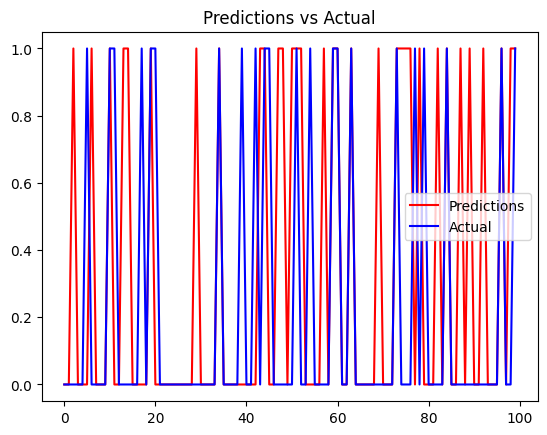

In [72]:
plt.plot(predictions.ravel(), label='Predictions', color='red')
plt.plot(np.array(TestY)[:100], label='Actual', color='blue')
plt.legend()
plt.title('Predictions vs Actual')
plt.show()

In [78]:
f"{round(accuracy_score(TestY, predictions.ravel()),2)}%"

'0.67%'